In [193]:
import knapsack as knap
import timeit
import time
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [116]:
%matplotlib inline

## The Data

In [104]:
instances = dict()
for filename in glob.iglob('data/knap_??.inst.dat'):
    with open(filename) as f:
        instances.update(knap.read_instances(f))

df = pd.DataFrame.from_dict(instances, orient='index')
df.info()
df.head()

In [215]:
def read_solutions(f):
    data = {}
    for line in f.readlines():
        items = list(map(int, line.split()))
        data[items[0]] = {
            'solution_value': items[2],
            'solution': items[3:]
        }
    return data

In [225]:
solutions = dict()
for filename in glob.iglob('data/knap_??.sol.dat'):
    with open(filename) as f:
        solutions.update(read_solutions(f))
sol_df = pd.DataFrame.from_dict(solutions, orient='index')

In [227]:
df = pd.concat([df, sol_df], axis=1)

In [ ]:
# save DataFrame
df.to_csv('data-bu.csv')

In [229]:
# restore DataFrame
bu = pd.read_csv('data-bu.csv', index_col=0)
bu.head()

,n,m,weights,values,heuristic_time,brute_force_time,solution_value,solution
9000,4,100,"[18, 42, 88, 3]","[114, 136, 192, 223]",0.000037,0.000055,473,"[1, 1, 0, 1]"
9001,4,100,"[55, 81, 14, 52]","[29, 64, 104, 222]",0.000030,0.000055,326,"[0, 0, 1, 1]"
9002,4,100,"[89, 18, 57, 69]","[196, 62, 34, 112]",0.000027,0.000051,196,"[1, 0, 0, 0]"
9003,4,100,"[34, 23, 62, 2]","[169, 152, 44, 224]",0.000029,0.000059,545,"[1, 1, 0, 1]"
9004,4,100,"[67, 74, 87, 65]","[145, 111, 139, 243]",0.000023,0.000061,243,"[0, 0, 0, 1]"


In [191]:
ns = [4, 10, 15, 20, 22, 25, 27, 30, 32, 35, 37, 40]

In [204]:
def time_instances(fn, ns, df, time_column):
    for n in ns:
        for idx, inst in df[df['n'] == n].iterrows():
            global inst_fn  # TODO global allows to make import from __main__
            inst_fn = partial(fn, *inst[['n', 'm', 'weights', 'values']])
            timer = timeit.Timer('inst_fn()', setup='from __main__ import inst_fn', timer=time.process_time)
            t = timer.timeit(number=1)
            df.loc[idx, time_column] = t
            print(idx, inst['n'], t)

## Brute Force

In [ ]:
time_instances(knap.brute_force, [25], df, 'brute_force_time')

9250 25 142.34199935300012
9251 25 144.34937466100018
9252 25 142.0678753530001
9253 25 137.72463964999997
9254 25 137.53795935399967
9255 25 139.51345229900016
9256 25 139.81185009399996
9257 25 142.58612100599976
9258 25 139.8333178339999
9259 25 145.52620155000022
9260 25 143.94240743800037
9261 25 135.96050391300014
9262 25 142.71292889699998


In [ ]:
df.boxplot(column='breakute_force_time', by='n')

In [ ]:
# TODO xticks do not correspond
df.groupby(by='n')['n', 'brute_force_time'].mean().plot(kind='scatter', x='n', y='brute_force_time')

## Heuristic

In [198]:
time_instances(knap.heuristic, ns, df, 'heuristic_time')

9000 4 3.7322000025596935e-05
9001 4 3.0247000040617422e-05
9002 4 2.7441999918664806e-05
9003 4 2.940400008810684e-05
9004 4 2.3212000087369233e-05
9005 4 2.2166000007928233e-05
9006 4 3.7595000094370334e-05
9007 4 2.2296999986792798e-05
9008 4 2.1057999902041047e-05
9009 4 1.9610999970609555e-05
9010 4 4.0616999967824086e-05
9011 4 2.9261999998198007e-05
9012 4 2.9271000130393077e-05
9013 4 2.240500020889158e-05
9014 4 1.9883000049958355e-05
9015 4 3.502799995658279e-05
9016 4 2.9653999945367104e-05
9017 4 2.8079000003344845e-05
9018 4 2.2117999833426438e-05
9019 4 2.1309999965524185e-05
9020 4 2.1551999907387653e-05
9021 4 2.0633000076486496e-05
9022 4 2.0259999928384786e-05
9023 4 2.068699996016221e-05
9024 4 2.249700014544942e-05
9025 4 4.038399993078201e-05
9026 4 5.3338000043368083e-05
9027 4 2.139299999726063e-05
9028 4 2.187299992328917e-05
9029 4 2.079000000776432e-05
9030 4 2.084899983856303e-05
9031 4 2.1125000102983904e-05
9032 4 2.122299997608934e-05
9033 4 2.136900002369

9287 25 4.36609998359927e-05
9288 25 5.6768999911582796e-05
9289 25 0.0001217169999563339
9290 25 4.330100000515813e-05
9291 25 4.0340000168725965e-05
9292 25 4.065899997840461e-05
9293 25 4.359799982012191e-05
9294 25 3.9376999893647735e-05
9295 25 4.269400005796342e-05
9296 25 7.604799998262024e-05
9297 25 4.237099983583903e-05
9298 25 3.817399988292891e-05
9299 25 5.989999999655993e-05
9300 27 4.960599994774384e-05
9301 27 8.300300009977946e-05
9302 27 4.330000001573353e-05
9303 27 7.640300009370549e-05
9304 27 4.7855000048002694e-05
9305 27 7.766699991407222e-05
9306 27 6.59880001876445e-05
9307 27 4.45840000793396e-05
9308 27 6.258100006562017e-05
9309 27 6.132499993327656e-05
9310 27 5.314500003805733e-05
9311 27 3.93899999835412e-05
9312 27 5.081199992673646e-05
9313 27 7.084100002430205e-05
9314 27 8.624400015833089e-05
9315 27 5.294000015965139e-05
9316 27 3.594800000428222e-05
9317 27 4.0411000099993544e-05
9318 27 5.138500000612112e-05
9319 27 4.369199996290263e-05
9320 27 4

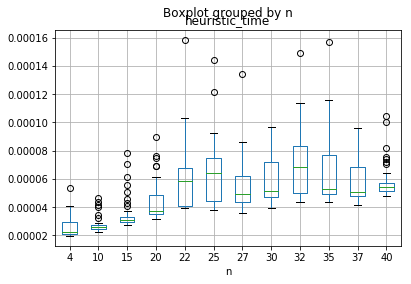

In [199]:
df.boxplot(column='heuristic_time', by='n')

In [237]:
def solve_instances(fn, ns, df, solution_column):
    for n in ns:
        for idx, inst in df[df['n'] == n].iterrows():
            value, _ = fn(*inst[['n', 'm', 'weights', 'values']])
            df.loc[idx, solution_column] = value
            print(idx, inst['n'], value)

solve_instances(knap.heuristic, ns, df, 'heuristic_value')

9000 4 473
9001 4 326
9002 4 174
9003 4 545
9004 4 243
9005 4 563
9006 4 410
9007 4 375
9008 4 224
9009 4 224
9010 4 290
9011 4 459
9012 4 325
9013 4 431
9014 4 472
9015 4 230
9016 4 452
9017 4 306
9018 4 483
9019 4 227
9020 4 229
9021 4 496
9022 4 286
9023 4 387
9024 4 320
9025 4 222
9026 4 512
9027 4 181
9028 4 288
9029 4 372
9030 4 296
9031 4 309
9032 4 501
9033 4 100
9034 4 253
9035 4 585
9036 4 584
9037 4 147
9038 4 251
9039 4 159
9040 4 314
9041 4 401
9042 4 437
9043 4 398
9044 4 505
9045 4 319
9046 4 217
9047 4 330
9048 4 254
9049 4 462
9050 10 798
9051 10 942
9052 10 740
9053 10 956
9054 10 1449
9055 10 1351
9056 10 1375
9057 10 1153
9058 10 1220
9059 10 1222
9060 10 1319
9061 10 1169
9062 10 90
9063 10 1023
9064 10 1389
9065 10 1097
9066 10 1024
9067 10 1195
9068 10 872
9069 10 1099
9070 10 1286
9071 10 1178
9072 10 1192
9073 10 939
9074 10 756
9075 10 1240
9076 10 839
9077 10 1033
9078 10 1386
9079 10 1266
9080 10 933
9081 10 934
9082 10 952
9083 10 1446
9084 10 1196
9085 10 

In [242]:
df['relative_error'] = (df['solution_value'] - df['heuristic_value']) / df['solution_value']

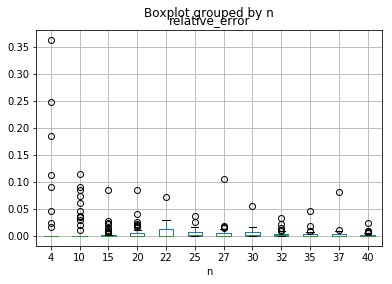

In [246]:
df.boxplot(column='relative_error', by='n')

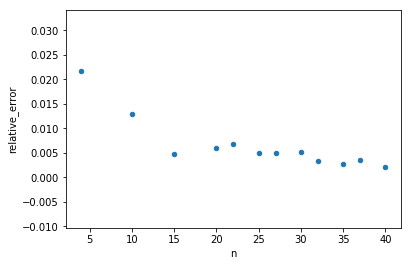

In [248]:
df.groupby(by='n')['n', 'relative_error'].mean().plot(kind='scatter', x='n', y='relative_error')